In [1]:
!pip install pandas scikit-learn nltk


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [7]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\GOWCIGAN
[nltk_data]     M\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [8]:
dataset = pd.read_csv("twitter sentiment (1).csv")

In [9]:
dataset.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [10]:
dataset.shape

(27451, 4)

In [11]:
dataset.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [16]:
# Assuming 'dataset' is a pandas DataFrame
duplicate_rows = dataset.duplicated()


In [17]:
duplicate_rows

0        False
1        False
2        False
3        False
4        False
         ...  
27446    False
27447    False
27448    False
27449    False
27450    False
Length: 27451, dtype: bool

In [24]:
## Preprocess the data
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    return ' '.join([ps.stem(word) for word in text.split() if word.lower() not in stop_words])

dataset["processed_text"] = dataset['text'].apply(preprocess_text)

In [25]:
## Split the dataset
x_train, x_test, y_train, y_test = train_test_split(dataset["processed_text"], dataset['sentiment'], test_size = 0.2, random_state = 42)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming x_train and x_test are your text data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)


In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
model = KNeighborsClassifier()

In [30]:
model.fit(x_train_tfidf, y_train)

KNeighborsClassifier()

In [33]:
predictions = model.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
print(accuracy)
print(report)

0.47058823529411764
              precision    recall  f1-score   support

    negative       0.71      0.13      0.21      1556
     neutral       0.43      0.94      0.59      2172
    positive       0.81      0.19      0.31      1763

    accuracy                           0.47      5491
   macro avg       0.65      0.42      0.37      5491
weighted avg       0.63      0.47      0.39      5491



In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 195 1344   17]
 [  62 2049   61]
 [  18 1405  340]]


In [37]:
from sklearn.svm import SVC

In [38]:
model = SVC(kernel='linear')

In [39]:
model.fit(x_train_tfidf, y_train)

SVC(kernel='linear')

In [41]:
predictions = model.predict(x_test_tfidf)
accuracy = accuracy_score(y_test, predictions)*100
report = classification_report(y_test, predictions)
print(accuracy)
print(report)

69.82334729557458
              precision    recall  f1-score   support

    negative       0.74      0.60      0.66      1556
     neutral       0.63      0.76      0.69      2172
    positive       0.78      0.71      0.74      1763

    accuracy                           0.70      5491
   macro avg       0.72      0.69      0.70      5491
weighted avg       0.71      0.70      0.70      5491




[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


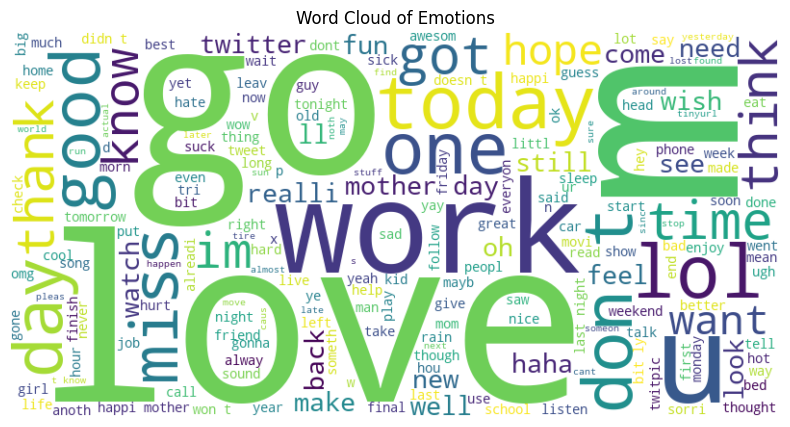

In [43]:
# Install necessary library
!pip install wordcloud

# Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(dataset['processed_text']))

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Emotions')
plt.show()

## 